# WeatherPy
----
Note

Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Part I, written description of three observable trends based on the data.

Observation 1:  
Latitude vs Temperature Plot - if we observe the plot we see that as you get closer to the equator the temperatures are higher in that region. Latitude vs Humidity Plot, humidity seems to be higer as the temperature rises, midian relationship to latitude. 

Observation 2:
Wind Speeds for Northern or Southern Hemisphere in average are mostly the same in both hemispheres with a few outlayers as the linear regression plot shows. 

Obeservation 3: 
Cloudiness for Northern vs Southern Hemisphere, there might be some correlation as you get further from the equator for both Hemisphere.  

      

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from pprint import pprint
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [6]:
# Create base URL and indicate imperial units
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key 

units = "imperial"
# Build partial query URL
query = f"{url}appid={weather_api_key}&units={units}&q="



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Inititate counter
counter = 1

#list items
city_name = []
dates = []
lat = []
lng = []
max_temp= []
humid = []
clouds = []
winds = []

#Loop through each city, extract items, and print result
print('------------------------------')
print('Beginning Data Retrieval')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
          
        dates.append(city_data['dt'])
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        winds.append(city_data['wind']['speed'])
        
        print(f'Processing Record {counter} of {len(cities)} | Added {city}')
        counter = counter + 1
    
    except KeyError:
        print(f'Missing data in city number {counter} of {len(cities)}. | Skipping {city}')
        counter = counter + 1
        
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')



------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 1 of 631 | Added ust-koksa
Processing Record 2 of 631 | Added esperance
Processing Record 3 of 631 | Added carnarvon
Processing Record 4 of 631 | Added iqaluit
Processing Record 5 of 631 | Added ushuaia
Processing Record 6 of 631 | Added sao gabriel da cachoeira
Processing Record 7 of 631 | Added lorengau
Processing Record 8 of 631 | Added dunmore east
Processing Record 9 of 631 | Added port hedland
Processing Record 10 of 631 | Added vaini
Processing Record 11 of 631 | Added mamakan
Processing Record 12 of 631 | Added puerto ayora
Processing Record 13 of 631 | Added manaure
Processing Record 14 of 631 | Added ancud
Processing Record 15 of 631 | Added antalaha
Processing Record 16 of 631 | Added liaqatabad
Processing Record 17 of 631 | Added rzhev
Processing Record 18 of 631 | Added rio gallegos
Processing Record 19 of 631 | Added yar-sale
Processing Record 20 of 631 | Added barrow


Processing Record 177 of 631 | Added malumfashi
Processing Record 178 of 631 | Added jaque
Missing data in city number 179 of 631. | Skipping amderma
Processing Record 180 of 631 | Added irbeyskoye
Processing Record 181 of 631 | Added nikolskoye
Processing Record 182 of 631 | Added oistins
Processing Record 183 of 631 | Added lebu
Processing Record 184 of 631 | Added nisia floresta
Processing Record 185 of 631 | Added maragogi
Processing Record 186 of 631 | Added bambous virieux
Processing Record 187 of 631 | Added komsomolskiy
Processing Record 188 of 631 | Added goryachegorsk
Processing Record 189 of 631 | Added ponta delgada
Processing Record 190 of 631 | Added alyangula
Processing Record 191 of 631 | Added saint george
Processing Record 192 of 631 | Added fort nelson
Processing Record 193 of 631 | Added dobryanka
Processing Record 194 of 631 | Added cartagena
Processing Record 195 of 631 | Added amapa
Processing Record 196 of 631 | Added tasiilaq
Processing Record 197 of 631 | Adde

Processing Record 353 of 631 | Added bathsheba
Processing Record 354 of 631 | Added la asuncion
Processing Record 355 of 631 | Added dimitrovgrad
Processing Record 356 of 631 | Added bubaque
Processing Record 357 of 631 | Added griffith
Missing data in city number 358 of 631. | Skipping vaitupu
Processing Record 359 of 631 | Added praya
Processing Record 360 of 631 | Added asheboro
Processing Record 361 of 631 | Added livramento
Processing Record 362 of 631 | Added carutapera
Processing Record 363 of 631 | Added shiyan
Processing Record 364 of 631 | Added cairns
Processing Record 365 of 631 | Added northam
Processing Record 366 of 631 | Added necochea
Processing Record 367 of 631 | Added eydhafushi
Processing Record 368 of 631 | Added montorio al vomano
Processing Record 369 of 631 | Added cururupu
Processing Record 370 of 631 | Added avarua
Processing Record 371 of 631 | Added saint-augustin
Processing Record 372 of 631 | Added westport
Processing Record 373 of 631 | Added ola
Process

Processing Record 528 of 631 | Added tingi
Processing Record 529 of 631 | Added tambo
Processing Record 530 of 631 | Added dekernes
Processing Record 531 of 631 | Added tanggu
Processing Record 532 of 631 | Added kautokeino
Processing Record 533 of 631 | Added celestun
Processing Record 534 of 631 | Added sept-iles
Processing Record 535 of 631 | Added yumen
Processing Record 536 of 631 | Added yulara
Processing Record 537 of 631 | Added caravelas
Processing Record 538 of 631 | Added winnemucca
Processing Record 539 of 631 | Added doka
Processing Record 540 of 631 | Added maiduguri
Processing Record 541 of 631 | Added itaporanga
Processing Record 542 of 631 | Added nara
Processing Record 543 of 631 | Added el tigre
Processing Record 544 of 631 | Added mandera
Missing data in city number 545 of 631. | Skipping umzimvubu
Processing Record 546 of 631 | Added tyup
Processing Record 547 of 631 | Added broome
Processing Record 548 of 631 | Added zhangye
Processing Record 549 of 631 | Added na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Lat': lat,
                            'Lng': lng,
                            'Temperature': max_temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': winds, 
                            'Date': dates})

#Save dataframe as 'cities.csv'
pd.DataFrame.to_csv(city_data_df, output_data_file)

city_data_df.head()


,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Ust'-Koksa,50.27,85.61,36.01,74,100,2.35,1603826074
1,Esperance,-33.87,121.90,53.60,100,75,5.82,1603825920
2,Carnarvon,-24.87,113.63,68.00,88,0,20.80,1603825865
3,Iqaluit,63.75,-68.51,14.00,78,40,5.82,1603826075
4,Ushuaia,-54.80,-68.30,46.40,42,40,16.11,1603825842


In [22]:
dc = (city_data_df)

dc.describe(include='all')

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,585,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
unique,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Salalah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.060991,17.242957,58.412923,71.117949,51.338462,7.514872,1.603826e+09
std,NaN,32.890558,88.815378,22.957893,22.287308,41.580937,5.148143,6.368049e+01
min,NaN,-54.800000,-175.200000,-10.260000,1.000000,0.000000,0.270000,1.603826e+09
25%,NaN,-5.050000,-63.890000,42.010000,61.000000,1.000000,3.620000,1.603826e+09
50%,NaN,26.590000,23.680000,62.600000,77.000000,64.000000,6.080000,1.603826e+09
75%,NaN,48.680000,92.400000,77.610000,88.000000,94.000000,10.290000,1.603826e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#  Get the indices of cities that have humidity over 100%.


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

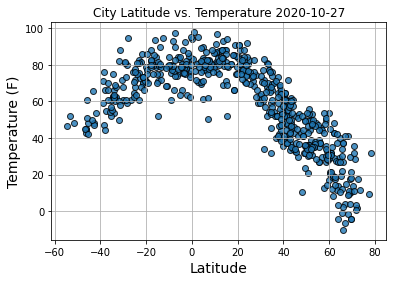

In [25]:
#Plot latitude vs temperature and save as .png
plt.figure(figsize=(6,4))
plt.scatter(city_data_df['Lat'], city_data_df['Temperature'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")
plt.title(f'City Latitude vs. Temperature {date.today()}',fontsize='12')
plt.xlabel('Latitude',fontsize='14')
plt.ylabel('Temperature (F)',fontsize='14')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')



## Latitude vs. Humidity Plot

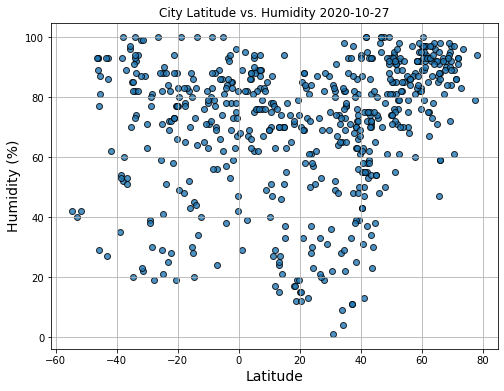

In [26]:
#Plot latitude vs humidity and save as .png
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")
plt.title(f'City Latitude vs. Humidity {date.today()}',fontsize='12')
plt.xlabel('Latitude',fontsize='14')
plt.ylabel('Humidity (%)',fontsize='14')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

## Latitude vs. Cloudiness Plot

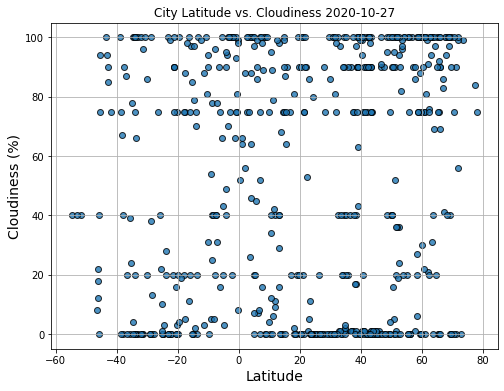

In [27]:
#Plot latitude vs cloudiness and save as .png
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")
plt.title(f'City Latitude vs. Cloudiness {date.today()}',fontsize='12')
plt.xlabel('Latitude',fontsize='14')
plt.ylabel('Cloudiness (%)',fontsize='14')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')


## Latitude vs. Wind Speed Plot

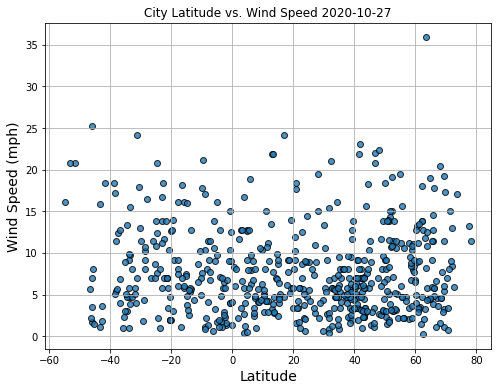

In [28]:
#Plot latitude vs wind speed and save as .png
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")
plt.title(f'City Latitude vs. Wind Speed {date.today()}',fontsize='12')
plt.xlabel('Latitude',fontsize='14')
plt.ylabel('Wind Speed (mph)',fontsize='14')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')


## Linear Regression

In [29]:
# Create Northern and Southern Hemisphere DataFrames
mask = city_data_df['Lat'] > 0
northern_hemisphere = city_data_df[mask]
southern_hemisphere = city_data_df[~mask]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

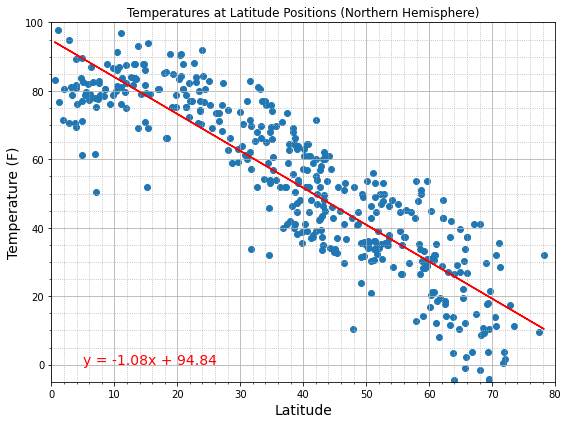

r-value is -0.8821


<Figure size 432x288 with 0 Axes>

In [30]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)',fontsize='12')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=14,color="red")
plt.xlabel('Latitude',fontsize='14')
plt.ylabel('Temperature (F)',fontsize='14')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_temp2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

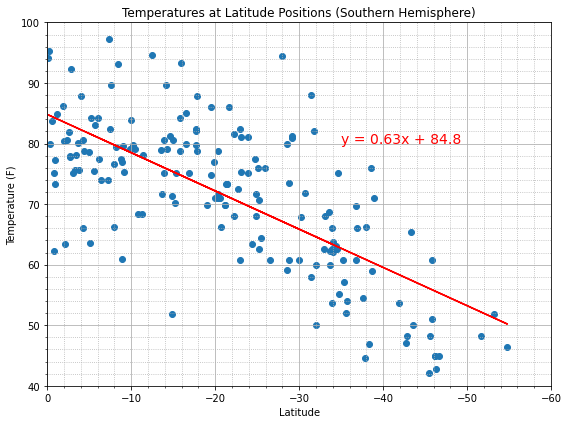

r-value is 0.7084


<Figure size 432x288 with 0 Axes>

In [31]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_temp3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

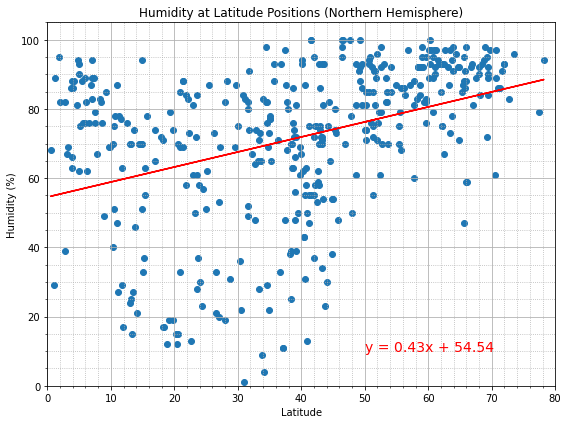

r-value is 0.3797


<Figure size 432x288 with 0 Axes>

In [32]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_humdity2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 


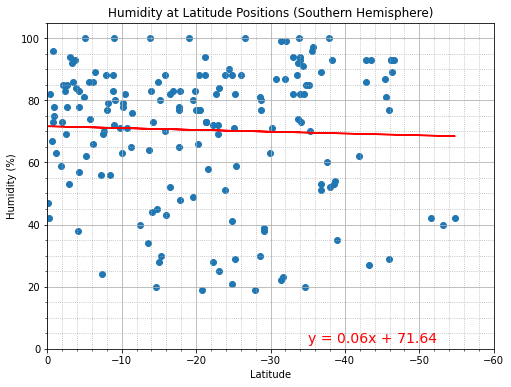

r-value is 0.037


<Figure size 432x288 with 0 Axes>

In [33]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
print ('The r-value is: ')
plt.annotate(line_eq,(-35,2),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
plt.savefig('lat_humdity3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

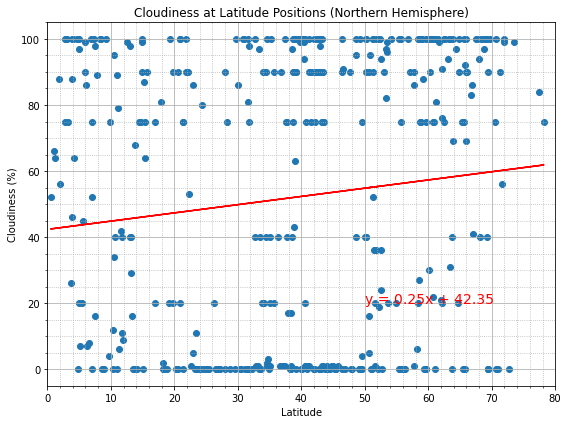

r-value is 0.1166


<Figure size 432x288 with 0 Axes>

In [34]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_clouds2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

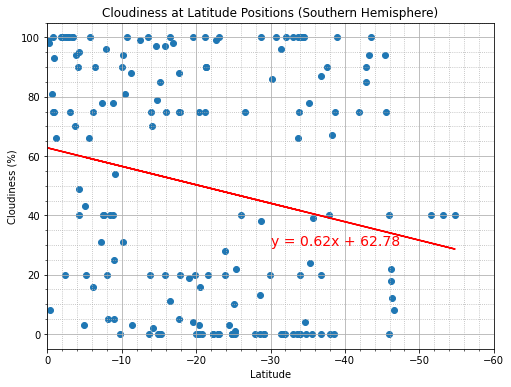

r-value is 0.2142


<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
plt.savefig('lat_clouds3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

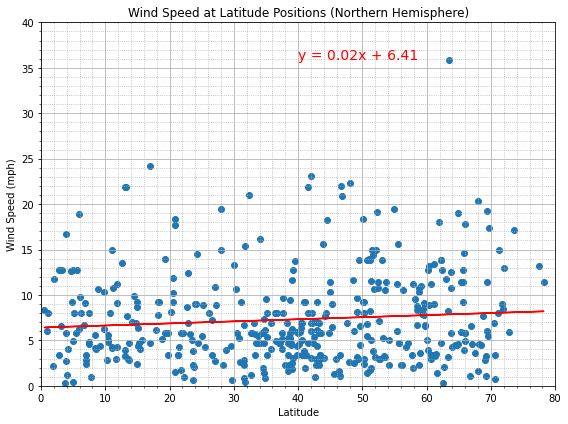

r-value is 0.0899


<Figure size 432x288 with 0 Axes>

In [36]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,36),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_wind2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

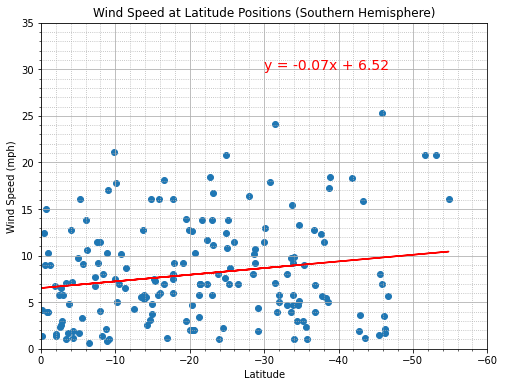

r-value is -0.1815


<Figure size 432x288 with 0 Axes>

In [37]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#correlation = st.pearsonr(x_values, y_values)

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
plt.savefig('lat_wind3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")